In [1]:
using MomentClosure, Catalyst, Distributions, JumpProcesses, DiffEqBase, OrdinaryDiffEq, DiffEqBase.EnsembleAnalysis, Plots, Latexify

┌ Info: Precompiling MomentClosure [01a1b25a-ecf0-48c5-ae58-55bfd5393600]
└ @ Base loading.jl:1423


In [2]:
# Proteins are produced in bursts of size m,
# where m is a geometric random variable with mean b.
# Note that if b is the mean burst size, then p = 1/(1+b).
# Implemented by first registering the distribution with Symbolics
@register_symbolic Distributions.Geometric(b)
@parameters b
m = rand(Distributions.Geometric(1/(1+b)))

rn = @reaction_network begin
      k_on*(1-g), 0 --> g  # G* -> G
      k_off*P^2, g --> 0   # G -> G*
      k_p, g --> g + $m*P  # G -> G + mP, m ~ Geometric(p)
      γ_p, P --> 0         # P -> ∅
end k_on k_off k_p γ_p

Model ##ReactionSystem#291
States (2):
  g(t)
  P(t)
Parameters (5):
  k_on
  k_off
  k_p
  γ_p
  b

In [3]:
eqs = generate_raw_moment_eqs(rn, 3)
latexify(eqs)

"\\begin{align*}\n\\frac{d\\mu_{1 0}}{dt} =& k_{on} - k_{on} \\mu_{1 0} - k_{off} \\mu_{1 2} \\\\\n\\frac{d\\mu_{0 1}}{dt} =& b k_{p} \\mu_{1 0} - \\gamma_{p} \\mu_{0 1} \\\\\n\\frac{d\\mu_{2 0}}{dt} =& k_{on} + k_{on} \\mu_{1 0} + k_{off} \\mu_{1 2} - 2 k_{on} \\mu_{2 0} - 2 k_{off} \\mu_{2 2" ⋯ 1604 bytes ⋯ "u_{1 0} + 7 b k_{p} \\left( \\frac{-1}{1 + b} \\right)^{2} \\mu_{1 0} - 6 k_{p} \\mu_{1 0}}{b \\left( \\frac{1}{1 + b} \\right)^{3} + \\left( \\frac{1}{1 + b} \\right)^{3}} + 3 \\gamma_{p} \\mu_{0 2} + 3 b k_{p} \\mu_{1 2} - \\gamma_{p} \\mu_{0 1} - 3 \\gamma_{p} \\mu_{0 3}\n\\end{align*}\n"

In [4]:
println(latexify(eqs))

\begin{align*}
\frac{d\mu_{1 0}}{dt} =& k_{on} - k_{on} \mu_{1 0} - k_{off} \mu_{1 2} \\
\frac{d\mu_{0 1}}{dt} =& b k_{p} \mu_{1 0} - \gamma_{p} \mu_{0 1} \\
\frac{d\mu_{2 0}}{dt} =& k_{on} + k_{on} \mu_{1 0} + k_{off} \mu_{1 2} - 2 k_{on} \mu_{2 0} - 2 k_{off} \mu_{2 2} \\
\frac{d\mu_{1 1}}{dt} =& k_{on} \mu_{0 1} + b k_{p} \mu_{2 0} - k_{off} \mu_{1 3} - k_{on} \mu_{1 1} - \gamma_{p} \mu_{1 1} \\
\frac{d\mu_{0 2}}{dt} =& \gamma_{p} \mu_{0 1} + \frac{k_{p} \left( \frac{-1}{1 + b} \right)^{2} \mu_{1 0} + 2 b k_{p} \mu_{1 0} + b k_{p} \left( \frac{-1}{1 + b} \right)^{2} \mu_{1 0} - k_{p} \mu_{1 0}}{b \left( \frac{1}{1 + b} \right)^{2} + \left( \frac{1}{1 + b} \right)^{2}} + 2 b k_{p} \mu_{1 1} - 2 \gamma_{p} \mu_{0 2} \\
\frac{d\mu_{3 0}}{dt} =& k_{on} + 2 k_{on} \mu_{1 0} + 3 k_{off} \mu_{2 2} - k_{off} \mu_{1 2} - 3 k_{on} \mu_{3 0} - 3 k_{off} \mu_{3 2} \\
\frac{d\mu_{2 1}}{dt} =& k_{off} \mu_{1 3} + k_{on} \mu_{0 1} + k_{on} \mu_{1 1} + b k_{p} \mu_{3 0} - 2 k_{off} \mu_{2 3} - \gam

In [5]:
@parameters p
m = rand(Distributions.Geometric(p))

rn = @reaction_network begin
      k_on*(1-g), 0 --> g
      k_off*P^2, g --> 0
      k_p, g --> g + $m*P
      γ_p, P --> 0
end k_on k_off k_p γ_p

eqs = generate_raw_moment_eqs(rn, 3)
latexify(eqs)

"\\begin{align*}\n\\frac{d\\mu_{1 0}}{dt} =& k_{on} - k_{on} \\mu_{1 0} - k_{off} \\mu_{1 2} \\\\\n\\frac{d\\mu_{0 1}}{dt} =& k_{p} p^{-1} \\mu_{1 0} - \\gamma_{p} \\mu_{0 1} - k_{p} \\mu_{1 0} \\\\\n\\frac{d\\mu_{2 0}}{dt} =& k_{on} + k_{on} \\mu_{1 0} + k_{off} \\mu_{1 2} - 2 k_{on} \\mu_{2 " ⋯ 1016 bytes ⋯ "u_{0 2} + 7 k_{p} p^{-1} \\mu_{1 0} + 3 k_{p} p^{-1} \\mu_{1 2} + 6 k_{p} p^{-3} \\mu_{1 0} + 6 k_{p} p^{-2} \\mu_{1 1} - \\gamma_{p} \\mu_{0 1} - k_{p} \\mu_{1 0} - 3 k_{p} \\mu_{1 2} - 3 \\gamma_{p} \\mu_{0 3} - 9 k_{p} p^{-1} \\mu_{1 1} - 12 k_{p} p^{-2} \\mu_{1 0}\n\\end{align*}\n"

In [6]:
println(latexify(eqs))

\begin{align*}
\frac{d\mu_{1 0}}{dt} =& k_{on} - k_{on} \mu_{1 0} - k_{off} \mu_{1 2} \\
\frac{d\mu_{0 1}}{dt} =& k_{p} p^{-1} \mu_{1 0} - \gamma_{p} \mu_{0 1} - k_{p} \mu_{1 0} \\
\frac{d\mu_{2 0}}{dt} =& k_{on} + k_{on} \mu_{1 0} + k_{off} \mu_{1 2} - 2 k_{on} \mu_{2 0} - 2 k_{off} \mu_{2 2} \\
\frac{d\mu_{1 1}}{dt} =& k_{on} \mu_{0 1} + k_{p} p^{-1} \mu_{2 0} - k_{off} \mu_{1 3} - k_{on} \mu_{1 1} - \gamma_{p} \mu_{1 1} - k_{p} \mu_{2 0} \\
\frac{d\mu_{0 2}}{dt} =& \gamma_{p} \mu_{0 1} + k_{p} \mu_{1 0} + 2 k_{p} p^{-2} \mu_{1 0} + 2 k_{p} p^{-1} \mu_{1 1} - 2 k_{p} \mu_{1 1} - 2 \gamma_{p} \mu_{0 2} - 3 k_{p} p^{-1} \mu_{1 0} \\
\frac{d\mu_{3 0}}{dt} =& k_{on} + 2 k_{on} \mu_{1 0} + 3 k_{off} \mu_{2 2} - k_{off} \mu_{1 2} - 3 k_{on} \mu_{3 0} - 3 k_{off} \mu_{3 2} \\
\frac{d\mu_{2 1}}{dt} =& k_{off} \mu_{1 3} + k_{on} \mu_{0 1} + k_{on} \mu_{1 1} + k_{p} p^{-1} \mu_{3 0} - 2 k_{off} \mu_{2 3} - \gamma_{p} \mu_{2 1} - k_{p} \mu_{3 0} - 2 k_{on} \mu_{2 1} \\
\frac{d\mu_{1 2}}{dt} =& 

In [7]:
# specify the indices of species which molecule numbers are binary
binary_vars = [1]
# simplify the moment equations using properties of Bernoulli variables
clean_eqs = bernoulli_moment_eqs(eqs, binary_vars)
latexify(clean_eqs)

"\\begin{align*}\n\\frac{d\\mu_{1 0}}{dt} =& k_{on} - k_{on} \\mu_{1 0} - k_{off} \\mu_{1 2} \\\\\n\\frac{d\\mu_{0 1}}{dt} =& k_{p} p^{-1} \\mu_{1 0} - \\gamma_{p} \\mu_{0 1} - k_{p} \\mu_{1 0} \\\\\n\\frac{d\\mu_{1 1}}{dt} =& k_{on} \\mu_{0 1} + k_{p} p^{-1} \\mu_{1 0} - k_{p} \\mu_{1 0} - k_{" ⋯ 564 bytes ⋯ "u_{0 2} + 7 k_{p} p^{-1} \\mu_{1 0} + 3 k_{p} p^{-1} \\mu_{1 2} + 6 k_{p} p^{-3} \\mu_{1 0} + 6 k_{p} p^{-2} \\mu_{1 1} - \\gamma_{p} \\mu_{0 1} - k_{p} \\mu_{1 0} - 3 k_{p} \\mu_{1 2} - 3 \\gamma_{p} \\mu_{0 3} - 9 k_{p} p^{-1} \\mu_{1 1} - 12 k_{p} p^{-2} \\mu_{1 0}\n\\end{align*}\n"

In [8]:
println(latexify(clean_eqs))

\begin{align*}
\frac{d\mu_{1 0}}{dt} =& k_{on} - k_{on} \mu_{1 0} - k_{off} \mu_{1 2} \\
\frac{d\mu_{0 1}}{dt} =& k_{p} p^{-1} \mu_{1 0} - \gamma_{p} \mu_{0 1} - k_{p} \mu_{1 0} \\
\frac{d\mu_{1 1}}{dt} =& k_{on} \mu_{0 1} + k_{p} p^{-1} \mu_{1 0} - k_{p} \mu_{1 0} - k_{off} \mu_{1 3} - k_{on} \mu_{1 1} - \gamma_{p} \mu_{1 1} \\
\frac{d\mu_{0 2}}{dt} =& \gamma_{p} \mu_{0 1} + k_{p} \mu_{1 0} + 2 k_{p} p^{-2} \mu_{1 0} + 2 k_{p} p^{-1} \mu_{1 1} - 2 k_{p} \mu_{1 1} - 2 \gamma_{p} \mu_{0 2} - 3 k_{p} p^{-1} \mu_{1 0} \\
\frac{d\mu_{1 2}}{dt} =& k_{on} \mu_{0 2} + k_{p} \mu_{1 0} + \gamma_{p} \mu_{1 1} + 2 k_{p} p^{-2} \mu_{1 0} + 2 k_{p} p^{-1} \mu_{1 1} - 2 k_{p} \mu_{1 1} - k_{off} \mu_{1 4} - k_{on} \mu_{1 2} - 2 \gamma_{p} \mu_{1 2} - 3 k_{p} p^{-1} \mu_{1 0} \\
\frac{d\mu_{0 3}}{dt} =& 3 k_{p} \mu_{1 1} + 3 \gamma_{p} \mu_{0 2} + 7 k_{p} p^{-1} \mu_{1 0} + 3 k_{p} p^{-1} \mu_{1 2} + 6 k_{p} p^{-3} \mu_{1 0} + 6 k_{p} p^{-2} \mu_{1 1} - \gamma_{p} \mu_{0 1} - k_{p} \mu_{1 0} - 3 k_{p

In [9]:
normal_eqs = moment_closure(eqs, "normal", binary_vars)
latexify(normal_eqs, :closure)

L"\begin{align*}
\mu_{1 3} =& \mu_{0 3} \mu_{1 0} + 3 \mu_{0 1} \mu_{1 2} + 6 \mu_{0 1}^{3} \mu_{1 0} + 3 \mu_{0 2} \mu_{1 1} - 6 \mu_{0 1}^{2} \mu_{1 1} - 6 \mu_{0 1} \mu_{0 2} \mu_{1 0} \\
\mu_{1 4} =& \mu_{0 4} \mu_{1 0} + 4 \mu_{0 3} \mu_{1 1} + 6 \mu_{0 2} \mu_{1 2} + 24 \mu_{0 1}^{3} \mu_{1 1} + 4 \mu_{0 1} \mu_{1 3} + 36 \mu_{0 1}^{2} \mu_{0 2} \mu_{1 0} - 24 \mu_{0 1}^{4} \mu_{1 0} - 6 \mu_{0 2}^{2} \mu_{1 0} - 12 \mu_{0 1}^{2} \mu_{1 2} - 24 \mu_{0 1} \mu_{0 2} \mu_{1 1} - 8 \mu_{0 1} \mu_{0 3} \mu_{1 0}
\end{align*}
"

In [10]:
println(latexify(normal_eqs, :closure))

\begin{align*}
\mu_{1 3} =& \mu_{0 3} \mu_{1 0} + 3 \mu_{0 1} \mu_{1 2} + 6 \mu_{0 1}^{3} \mu_{1 0} + 3 \mu_{0 2} \mu_{1 1} - 6 \mu_{0 1}^{2} \mu_{1 1} - 6 \mu_{0 1} \mu_{0 2} \mu_{1 0} \\
\mu_{1 4} =& \mu_{0 4} \mu_{1 0} + 4 \mu_{0 3} \mu_{1 1} + 6 \mu_{0 2} \mu_{1 2} + 24 \mu_{0 1}^{3} \mu_{1 1} + 4 \mu_{0 1} \mu_{1 3} + 36 \mu_{0 1}^{2} \mu_{0 2} \mu_{1 0} - 24 \mu_{0 1}^{4} \mu_{1 0} - 6 \mu_{0 2}^{2} \mu_{1 0} - 12 \mu_{0 1}^{2} \mu_{1 2} - 24 \mu_{0 1} \mu_{0 2} \mu_{1 1} - 8 \mu_{0 1} \mu_{0 3} \mu_{1 0}
\end{align*}



In [11]:
dm_eqs = moment_closure(eqs, "derivative matching", binary_vars)
latexify(dm_eqs, :closure)

L"\begin{align*}
\mu_{1 3} =& \mu_{0 1}^{3} \mu_{0 2}^{-3} \mu_{1 1}^{-3} \mu_{1 2}^{3} \mu_{0 3} \mu_{1 0} \\
\mu_{1 4} =& \mu_{0 1}^{-4} \mu_{0 2}^{6} \mu_{0 3}^{-4} \mu_{1 0}^{-1} \mu_{1 1}^{4} \mu_{1 2}^{-6} \mu_{1 3}^{4} \mu_{0 4}
\end{align*}
"

In [12]:
println(latexify(dm_eqs, :closure))

\begin{align*}
\mu_{1 3} =& \mu_{0 1}^{3} \mu_{0 2}^{-3} \mu_{1 1}^{-3} \mu_{1 2}^{3} \mu_{0 3} \mu_{1 0} \\
\mu_{1 4} =& \mu_{0 1}^{-4} \mu_{0 2}^{6} \mu_{0 3}^{-4} \mu_{1 0}^{-1} \mu_{1 1}^{4} \mu_{1 2}^{-6} \mu_{1 3}^{4} \mu_{0 4}
\end{align*}



In [13]:
cond_gaussian_eqs = moment_closure(eqs, "conditional gaussian", binary_vars)
latexify(cond_gaussian_eqs, :closure)

L"\begin{align*}
\mu_{1 3} =& 3 \mu_{1 0}^{-1} \mu_{1 1} \mu_{1 2} - 2 \mu_{1 0}^{-2} \mu_{1 1}^{3} \\
\mu_{1 4} =& 3 \mu_{1 0}^{-1} \mu_{1 2}^{2} + 6 \mu_{1 0}^{-3} \mu_{1 1}^{4} + 4 \mu_{1 0}^{-1} \mu_{1 1} \mu_{1 3} - 12 \mu_{1 0}^{-2} \mu_{1 1}^{2} \mu_{1 2}
\end{align*}
"

In [14]:
println(latexify(cond_gaussian_eqs, :closure))

\begin{align*}
\mu_{1 3} =& 3 \mu_{1 0}^{-1} \mu_{1 1} \mu_{1 2} - 2 \mu_{1 0}^{-2} \mu_{1 1}^{3} \\
\mu_{1 4} =& 3 \mu_{1 0}^{-1} \mu_{1 2}^{2} + 6 \mu_{1 0}^{-3} \mu_{1 1}^{4} + 4 \mu_{1 0}^{-1} \mu_{1 1} \mu_{1 3} - 12 \mu_{1 0}^{-2} \mu_{1 1}^{2} \mu_{1 2}
\end{align*}



In [15]:
cond_dm_eqs = moment_closure(eqs, "conditional derivative matching", binary_vars)
latexify(cond_dm_eqs, :closure)

L"\begin{align*}
\mu_{1 3} =& \mu_{1 1}^{-3} \mu_{1 2}^{3} \mu_{1 0} \\
\mu_{1 4} =& \mu_{1 0}^{-1} \mu_{1 1}^{4} \mu_{1 2}^{-6} \mu_{1 3}^{4}
\end{align*}
"

In [16]:
println(latexify(dm_eqs, :closure))

\begin{align*}
\mu_{1 3} =& \mu_{0 1}^{3} \mu_{0 2}^{-3} \mu_{1 1}^{-3} \mu_{1 2}^{3} \mu_{0 3} \mu_{1 0} \\
\mu_{1 4} =& \mu_{0 1}^{-4} \mu_{0 2}^{6} \mu_{0 3}^{-4} \mu_{1 0}^{-1} \mu_{1 1}^{4} \mu_{1 2}^{-6} \mu_{1 3}^{4} \mu_{0 4}
\end{align*}



In [17]:
# PARAMETER INITIALISATION
mean_p = 200
mean_b = 70
p_val = 1/(1+mean_b)
γ_p_val = 1
k_off_val = 0.001
k_on_val = 0.05

k_p_val = mean_p * γ_p_val * (k_off_val * mean_p^2 + k_on_val) / (k_on_val * mean_b)

symmap = [:k_on => k_on_val,
          :k_off => k_off_val,
          :k_p => k_p_val,
          :γ_p => γ_p_val,
          :p => p_val]
pmap = symmap_to_varmap(rn, symmap)

u₀ = [1, 1]

tspan = (0., 6.0);

In [18]:
# convert the reaction network into a system of jump processes
jsys = convert(JumpSystem, rn; combinatoric_ratelaws=false)

# create a discrete problem setting the simulation parameters
dprob = DiscreteProblem(jsys, u₀, tspan, pmap)

# create a JumpProblem compatible with ReactionSystemMod
jprob = JumpProblem(jsys, dprob, Direct(), save_positions=(false, false))

# simulate 2×10⁴ SSA trajectories
ensembleprob  = EnsembleProblem(jprob)
@time sol_SSA = solve(ensembleprob, SSAStepper(), saveat=0.1, trajectories=20000)
# compute the means and variances
means_ssa, vars_ssa = timeseries_steps_meanvar(sol_SSA);

  4.858357 seconds (14.30 M allocations: 901.032 MiB, 6.25% gc time, 63.45% compilation time)


In [19]:
dm_eqs.odes.states

Term{Real, Base.ImmutableDict{DataType, Any}}[μ₁₀(t), μ₀₁(t), μ₁₁(t), μ₀₂(t), μ₁₂(t), μ₀₃(t)][1:6]

In [20]:
plt_m = plot()   # plot mean protein number
plt_std = plot() # plot ssd of protein number

# construct the initial molecule number mapping
u₀map = deterministic_IC(u₀, dm_eqs)

# solve moment ODEs for each closure and plot the results
for closure in ["normal", "derivative matching", 
                "conditional gaussian", "conditional derivative matching"]
    
    # it is very quick so we just apply all closures again
    closed_eqs = moment_closure(eqs, closure, binary_vars)
    
    # solve the system of moment ODEs
    oprob = ODEProblem(closed_eqs, u₀map, tspan, pmap)
    sol = solve(oprob, AutoTsit5(Rosenbrock23()), saveat=0.01)
    
    # μ₀₁ is 2nd and μ₀₂ is 4th element in sol
    plt_m = plot!(plt_m, sol, vars=(0, 2), label=closure)
    plt_std = plot!(plt_std, sol.t, sqrt.(sol[4, :] .- sol[2, :].^2), label=closure)
    
end

plt_m = plot!(plt_m, xlabel="Time [hr]", ylabel="Protein mean level")
plt_m = plot!(plt_m, means_ssa.t, means_ssa[2,:], label="SSA", linestyle=:dash, color="gray")
plt_std = plot!(plt_std, xlabel="Time [hr]", ylabel="Protein standard deviation")
plt_std = plot!(plt_std, vars_ssa.t, sqrt.(vars_ssa[2,:]), label="SSA", linestyle=:dash, color="gray");

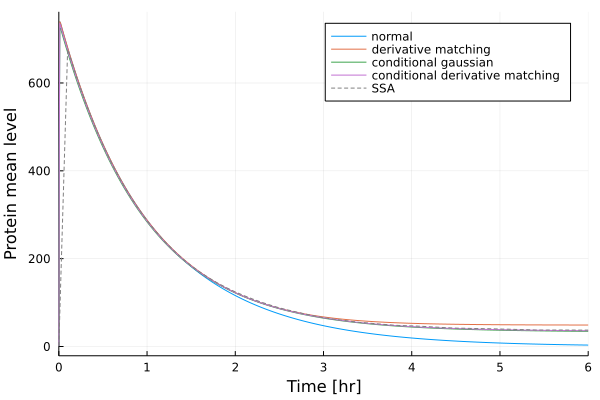

In [21]:
plot(plt_m, lw=2)

In [22]:
#savefig("../docs/src/assets/gene_1_means.svg")

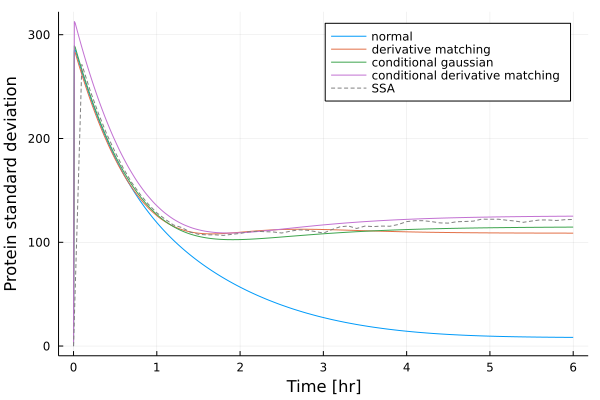

In [23]:
plot(plt_std, lw=2)

In [24]:
#savefig("../docs/src/assets/gene_1_stds.svg")

In [25]:
@register_symbolic Distributions.Geometric(b)
@parameters b_x b_y
m = rand(Distributions.Geometric(1/(1+b_x)))
l = rand(Distributions.Geometric(1/(1+b_y)))

rn = @reaction_network begin
      kx_on*(1-g_x)*y, 0 --> g_x  # 0   -> g_x
      kx_off,          g_x --> 0  # g_x -> 0
      ky_on*(1-g_y),   0 --> g_y  # 0 -> g_y
      ky_off*x,        g_y --> 0  # g_y -> 0
      k_x*g_x,         0 --> $m*x # 0 -> mx, m ~ Geometric(mean=b_x)
      γ_x,             x --> 0    # x -> 0
      k_y*g_y,         0 --> $l*y # 0 -> ly, l ~ Geometric(mean_b_y)
      γ_y,             y --> 0    # y -> 0
end kx_on kx_off ky_on ky_off k_x γ_x k_y γ_y

# both g_x and g_y are Bernoulli random variables
binary_vars = [1, 2];

In [26]:
# Parameter initialisation

mean_x = 100
mean_y = 100
mean_b_x = 5
mean_b_y = 5
γ_x_val = 1
γ_y_val = 1
kx_off_val = 4
ky_on_val = 0.3
kx_on_val = 0.05
ky_off_val = 0.05

k_x_val = mean_x * γ_x_val * (kx_off_val * mean_y^2 + kx_on_val) / (kx_on_val * mean_b_x)
k_y_val = mean_y * γ_y_val * (ky_off_val * mean_x^2 + ky_on_val) / (ky_on_val * mean_b_y)

# unclear if Soltani et al. (2015) actually used this parameter set as X numbers jump to millions
# making SSA extremely slow...

# introduce additional rescaling (otherwise rate coefficients are too high)
k_x_val *= 0.00003
k_y_val *= 0.01

# parameter mapping
symmap = [:kx_on => kx_on_val,
          :kx_off => kx_off_val,
          :ky_on => ky_on_val,
          :ky_off => ky_off_val,
          :k_x => k_x_val,
          :k_y => k_y_val,
          :γ_x => γ_x_val,
          :γ_y => γ_y_val,
          :b_x => mean_b_x,
          :b_y => mean_b_y]
pmap = symmap_to_varmap(rn, symmap)

# initial gene state and protein number, order [g_x, g_y, x, y]
u₀ = [1, 1, 1, 1]

# time interval to solve on
tspan = (0., 12.0);

In [27]:
eqs = generate_raw_moment_eqs(rn, 4);

In [28]:
# can compare to results in Soltani et al. (2015)
closed_eqs = moment_closure(eqs, "derivative matching", binary_vars)
latexify(closed_eqs, :closure)

"\\begin{align*}\n\\mu_{1 1 3 0} =& \\mu_{0 0 1 0}^{-3} \\mu_{0 0 2 0}^{3} \\mu_{0 0 3 0}^{-1} \\mu_{0 1 0 0}^{-1} \\mu_{0 1 1 0}^{3} \\mu_{0 1 2 0}^{-3} \\mu_{1 0 0 0}^{-1} \\mu_{1 0 1 0}^{3} \\mu_{1 0 2 0}^{-3} \\mu_{1 1 1 0}^{-3} \\mu_{1 1 2 0}^{3} \\mu_{0 1 3 0} \\mu_{1 0 3 0} \\mu_{" ⋯ 2821 bytes ⋯ "1 1 3} =& \\mu_{0 0 0 1}^{-3} \\mu_{0 0 0 2}^{3} \\mu_{0 0 0 3}^{-1} \\mu_{0 0 1 0}^{-1} \\mu_{0 0 1 1}^{3} \\mu_{0 0 1 2}^{-3} \\mu_{0 1 0 0}^{-1} \\mu_{0 1 0 1}^{3} \\mu_{0 1 0 2}^{-3} \\mu_{0 1 1 1}^{-3} \\mu_{0 1 1 2}^{3} \\mu_{0 0 1 3} \\mu_{0 1 0 3} \\mu_{0 1 1 0}\n\\end{align*}\n"

In [29]:
closed_eqs = moment_closure(eqs, "conditional derivative matching", binary_vars)
latexify(closed_eqs, :closure)

"\\begin{align*}\n\\mu_{1 1 3 0} =& \\mu_{1 0 0 0}^{-1} \\mu_{1 0 1 0}^{3} \\mu_{1 0 2 0}^{-3} \\mu_{1 1 1 0}^{-3} \\mu_{1 1 2 0}^{3} \\mu_{1 0 3 0} \\mu_{1 1 0 0} \\\\\n\\mu_{1 1 2 1} =& \\mu_{1 1 0 1}^{-1} \\mu_{1 1 1 0}^{-2} \\mu_{1 1 1 1}^{2} \\mu_{1 1 0 0} \\mu_{1 1 2 0} \\\\\n\\mu_{1 1 1" ⋯ 1203 bytes ⋯ "^{2} \\mu_{0 1 0 2}^{-1} \\mu_{0 1 1 0}^{2} \\mu_{0 1 1 1}^{-4} \\mu_{0 1 1 2}^{2} \\mu_{0 1 2 0}^{-1} \\mu_{0 1 2 1}^{2} \\\\\n\\mu_{0 1 1 3} =& \\mu_{0 1 0 0}^{-1} \\mu_{0 1 0 1}^{3} \\mu_{0 1 0 2}^{-3} \\mu_{0 1 1 1}^{-3} \\mu_{0 1 1 2}^{3} \\mu_{0 1 0 3} \\mu_{0 1 1 0}\n\\end{align*}\n"

In [30]:
closed_eqs = moment_closure(eqs, "normal", binary_vars)
latexify(closed_eqs, :closure); # very long

In [31]:
closed_eqs = moment_closure(eqs, "conditional gaussian", binary_vars)
latexify(closed_eqs, :closure)

"\\begin{align*}\n\\mu_{1 1 3 0} =& \\mu_{1 0 0 0}^{-1} \\mu_{1 0 3 0} \\mu_{1 1 0 0} + 3 \\mu_{1 0 0 0}^{-1} \\mu_{1 0 2 0} \\mu_{1 1 1 0} + 6 \\mu_{1 0 0 0}^{-3} \\mu_{1 0 1 0}^{3} \\mu_{1 1 0 0} + 3 \\mu_{1 0 0 0}^{-1} \\mu_{1 0 1 0} \\mu_{1 1 2 0} - 6 \\mu_{1 0 0 0}^{-2} \\mu_{1 0 1 " ⋯ 3653 bytes ⋯ "3} \\mu_{0 1 0 1}^{3} \\mu_{0 1 1 0} + 3 \\mu_{0 1 0 0}^{-1} \\mu_{0 1 0 2} \\mu_{0 1 1 1} + 3 \\mu_{0 1 0 0}^{-1} \\mu_{0 1 0 1} \\mu_{0 1 1 2} - 6 \\mu_{0 1 0 0}^{-2} \\mu_{0 1 0 1}^{2} \\mu_{0 1 1 1} - 6 \\mu_{0 1 0 0}^{-2} \\mu_{0 1 0 1} \\mu_{0 1 0 2} \\mu_{0 1 1 0}\n\\end{align*}\n"

In [32]:
closed_eqs.odes.states

Term{Real, Base.ImmutableDict{DataType, Any}}[μ₁₀₀₀(t), μ₀₁₀₀(t), μ₀₀₁₀(t), μ₀₀₀₁(t), μ₁₁₀₀(t), μ₁₀₁₀(t), μ₁₀₀₁(t), μ₀₁₁₀(t), μ₀₁₀₁(t), μ₀₀₂₀(t)  …  μ₁₀₀₃(t), μ₀₁₃₀(t), μ₀₁₂₁(t), μ₀₁₁₂(t), μ₀₁₀₃(t), μ₀₀₄₀(t), μ₀₀₃₁(t), μ₀₀₂₂(t), μ₀₀₁₃(t), μ₀₀₀₄(t)][1:40]

In [33]:
using Sundials # for CVODE_BDF

closed_eqs = moment_closure(eqs, "normal", binary_vars)
u₀map = deterministic_IC(u₀, closed_eqs)

oprob = ODEProblem(closed_eqs, u₀map, tspan, pmap)
sol = solve(oprob, CVODE_BDF(), saveat=0.1);


[CVODES WARNING]  CVode
  Internal t = 3.56837 and h = 1.3579e-16 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 3.56837 and h = 1.3579e-16 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 3.56837 and h = 1.67966e-17 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 3.56837 and h = 1.67966e-17 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 3.56837 and h = 1.67966e-16 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 3.56837 and h = 4.10073e-17 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 3.56837 and h = 4.10073e-17 are such that t + h = t on the next step. The solver will continue any

In [34]:
closed_eqs = moment_closure(eqs, "conditional gaussian", binary_vars)
u₀map = deterministic_IC(u₀, closed_eqs)

oprob = ODEProblem(closed_eqs, u₀map, tspan, pmap)
sol = solve(oprob, CVODE_BDF(), saveat=0.1);


[CVODES WARNING]  CVode
  Internal t = 1.16502 and h = 9.3868e-17 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1.16502 and h = 9.3868e-17 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1.16502 and h = 5.5769e-17 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1.16502 and h = 5.5769e-17 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1.16502 and h = 3.31338e-17 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1.16502 and h = 3.31338e-17 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 1.16502 and h = 1.96857e-17 are such that t + h = t on the next step. The solver will continue anywa

In [35]:
jsys = convert(JumpSystem, rn, combinatoric_ratelaws=false)
dprob = DiscreteProblem(jsys, u₀, tspan, pmap)
jprob = JumpProblem(jsys, dprob, Direct(), save_positions=(false, false))

ensembleprob  = EnsembleProblem(jprob)
@time sol_SSA = solve(ensembleprob, SSAStepper(), saveat=0.1, trajectories=10000)
means_ssa, vars_ssa = timeseries_steps_meanvar(sol_SSA);

 13.712331 seconds (43.27 M allocations: 1.697 GiB, 6.56% gc time, 10.01% compilation time)


In [36]:
plt_m = plot()   # plot mean activator protein number
plt_std = plot() # plot ssd of activator protein number

for closure in ["derivative matching", "conditional derivative matching"]

    closed_eqs = moment_closure(eqs, closure, binary_vars)

    u₀map = deterministic_IC(u₀, closed_eqs)
    oprob = ODEProblem(closed_eqs, u₀map, tspan, pmap)
    sol = solve(oprob, Tsit5(), saveat=0.1)

    # μ₀₀₀₁ is the 4th and μ₀₀₀₂ is the 12th element in sol (can check with closed_eqs.odes.states)
    plt_m = plot!(plt_m, sol, vars=(0, 4), label=closure)
    plt_std = plot!(plt_std, sol.t, sqrt.(sol[12, :] .- sol[4, :].^2), label=closure)
end

plt_m = plot!(plt_m, xlabel="Time [hr]", ylabel="Activator mean level")
plt_m = plot!(plt_m, means_ssa.t, means_ssa[4,:], label="SSA", linestyle=:dash, color="gray")
plt_std = plot!(plt_std, xlabel="Time [hr]", ylabel="Activator standard deviation")
plt_std = plot!(plt_std, vars_ssa.t, sqrt.(vars_ssa[4,:]), label="SSA", linestyle=:dash, color="gray");

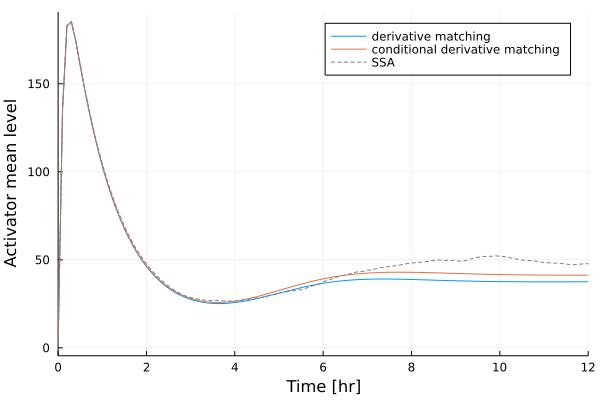

In [37]:
plot(plt_m, lw=2)

In [38]:
#savefig("../docs/src/assets/gene_2_means.svg")

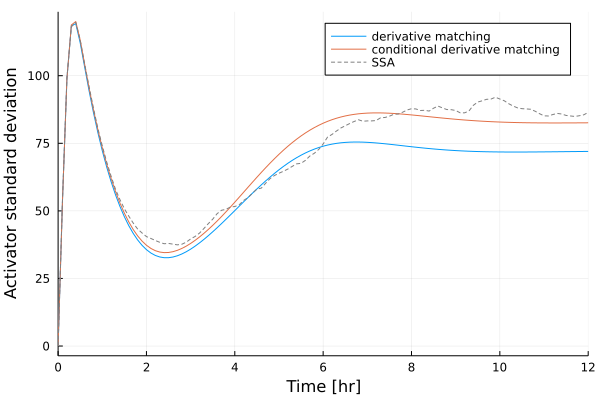

In [39]:
plot(plt_std, lw=2, xlims=(0., 12.))

In [40]:
#savefig("../docs/src/assets/gene_2_stds.svg")